<a href="https://colab.research.google.com/github/BarryLiu-97/Pytorch-Tutorial/blob/master/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 逻辑回归做分类任务
## 网络框架设计一般步骤
- 数据准备
- 用类设计模型
- 选定损失函数和优化器
- 训练循环


In [17]:
import torch

In [12]:
x_data = torch.Tensor([[1.0],[2.0],[3.0]])
y_data = torch.Tensor([[0],[0],[1]])

In [18]:
class LogisticRegressionModel(torch.nn.Module):
  def __init__(self):
    super(LogisticRegressionModel, self).__init__()
    self.linear = torch.nn.Linear(1,1)

  def forward(self, x):
    y_pred = torch.sigmoid(self.linear(x))
    return y_pred

In [19]:
model = LogisticRegressionModel()

criterion = torch.nn.BCELoss(size_average=False)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


In [21]:
for epoch in range(1000):
  y_pred = model(x_data)
  loss = criterion(y_pred, y_data)
  print(epoch, loss.item())     #注意，loss本身是tensor形式

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

0 2.1758503913879395
1 2.1493680477142334
2 2.124323844909668
3 2.100665807723999
4 2.0783395767211914
5 2.0572896003723145
6 2.037461280822754
7 2.0187973976135254
8 2.0012426376342773
9 1.984741449356079
10 1.9692389965057373
11 1.954681158065796
12 1.9410154819488525
13 1.9281909465789795
14 1.9161581993103027
15 1.9048690795898438
16 1.8942780494689941
17 1.884340763092041
18 1.8750157356262207
19 1.8662623167037964
20 1.8580429553985596
21 1.850321650505066
22 1.8430640697479248
23 1.836238145828247
24 1.8298141956329346
25 1.823763132095337
26 1.818058729171753
27 1.8126758337020874
28 1.8075909614562988
29 1.8027825355529785
30 1.7982304096221924
31 1.793915033340454
32 1.789819359779358
33 1.785926342010498
34 1.7822213172912598
35 1.778690218925476
36 1.7753190994262695
37 1.7720966339111328
38 1.7690110206604004
39 1.76605224609375
40 1.7632100582122803
41 1.7604761123657227
42 1.7578418254852295
43 1.7552995681762695
44 1.7528421878814697
45 1.7504637241363525
46 1.748157739

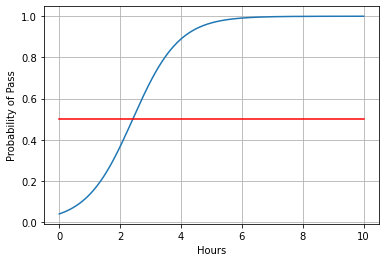

In [22]:
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(0, 10, 200)    #每周学习时间0~10小时，采200个点
x_t = torch.Tensor(x).view((200,1)) #变为tensor，view方法相当于numpy中的reshape   
y_t = model(x_t)
y = y_t.data.numpy()        #化为numpy数组

plt.plot(x, y)
plt.plot([0,10], [0.5,0.5], c='r')
plt.xlabel('Hours')
plt.ylabel('Probability of Pass')
plt.grid()
plt.show()

发现和logistic函数很像，那是因为x只是做了线性变换得到了y，即y=ax+b。  图中2.5小时及格率为0.5，符合数据特征